In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv("mushroom.csv")

In [2]:
# Display basic information
print("\nDataset Info:")
print(df.info())

# Show first few rows
print("\nFirst 5 Rows of the Dataset:")
print(df.head())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object

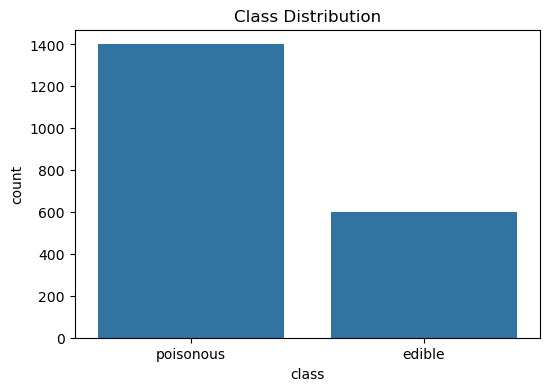

In [3]:
# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df)
plt.title("Class Distribution")
plt.show()

In [7]:
# Encode categorical features
encoder = LabelEncoder()
for column in df.columns:
    df[column] = encoder.fit_transform(df[column])  # Convert categorical to numeric

# Define features (X) and target variable (y)
X = df.drop("class", axis=1)  # Features
y = df["class"]  # Target (edible/poisonous)

# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Check dataset shape
print("\nTraining set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (2240, 25) (2240,)
Testing set: (560, 25) (560,)


In [ ]:
# Visualizing feature relationships using a pairplot
sample_df = df.sample(500, random_state=42)
sns.pairplot(sample_df, hue='class', diag_kind="hist")
plt.show()

In [9]:
# Train an SVM Classifier with RBF Kernel
svm_model = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', random_state=42)

In [11]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Model Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[147 133]
 [127 153]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.53      0.53       280
           1       0.53      0.55      0.54       280

    accuracy                           0.54       560
   macro avg       0.54      0.54      0.54       560
weighted avg       0.54      0.54      0.54       560



In [13]:
# Compute Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)


Model Accuracy: 0.5357142857142857


In [15]:
# Compare different SVM kernels using Cross-Validation
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    model = SVC(kernel=kernel, C=1, gamma='scale', class_weight='balanced')
    scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
    print(f"\nSVM with {kernel} kernel - Mean Accuracy: {np.mean(scores):.4f}")


SVM with linear kernel - Mean Accuracy: 0.6486

SVM with poly kernel - Mean Accuracy: 0.5018

SVM with rbf kernel - Mean Accuracy: 0.5071
